## Configuración inicial

In [164]:
# Importamos la librería
import nltk

# Dataset con muchos libros en ingles ya tokenizados
nltk.download('book')

# Importamos los libros
from nltk.book import *

# Importamos librerías utiles
import matplotlib.pyplot as plt
import numpy as np

import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/missael/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/missael/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/missael/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/missael/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/missael/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/missael/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package depend

## Analizando un texto

In [80]:
# Usaremos este libro
print(text1)

# Veamos los toknes
print(text1.tokens[:15])

# Número de tokens
print(len(text1))

<Text: Moby Dick by Herman Melville 1851>
['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.', '(', 'Supplied', 'by', 'a', 'Late']
260819


## Medidad de riqueza léxica de un texto

$$R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}}$$

In [81]:
# Obtenemos el conjunto de palabras únicas ordenadas
vocabulario = sorted(set(text1))
print(vocabulario[1000:1010])

# Obtenemos la riqueza léxica
R_l = len(vocabulario)/len(text1)
print(f'Riqueza léxica = {R_l}')

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts']
Riqueza léxica = 0.07406285585022564


In [82]:
def riqueza_lexica(text):
    return len(set(text))/len(text)

riqueza_lexica(text3)

0.06230453042623537

In [83]:
def porcentaje_palabra(palabra, texto):
    return 100*texto.count(palabra)/len(texto)

print(text1.count('monster'), porcentaje_palabra('monster', text1))

49 0.018786974875296663


## Estadísticas del lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras:
- Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras. 
- ejemplo `dic = {'monster': 49, 'boat': 54, ...}`

In [84]:
dic = {}

for word in vocabulario:
    dic[word] = text1.count(word)

Este ciclo for anterior es computacionalmente muy costoso, incluso para corpus muy pequeños. NLTK ya tiene una función para esto que es muy rápido:

In [86]:
# Obtenemos la frecuencia de distribución
fdist = FreqDist(text1)

# Veamos las más repetidas
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

Las palabras más repetidas no nos aportan necesariamente más información del texto que queremos analizar. La mayoria de las que se repiten más solo están ahí por las reglas del lenguaje.

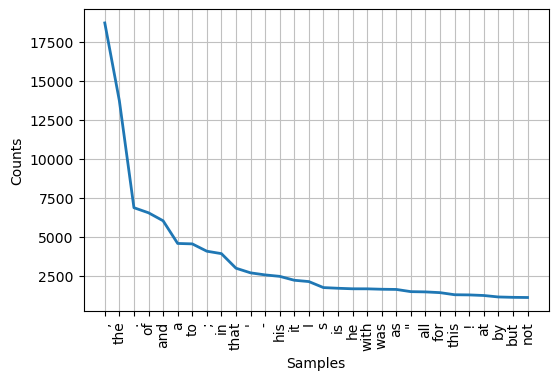

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [96]:
# Podemos graficar las palabras
fdist.plot(30)

In [97]:
# Podemos obtener también el número de aparición de una palabra
fdist['monster']

49

La distribución de palabras sigue una distribución de potencias 🤯. De echo si graficamos en el eje $x$ el word rank y en el eje $y$ el conteo, debemos observar una línea recta a $-45^o$. Podemos hacer esto:

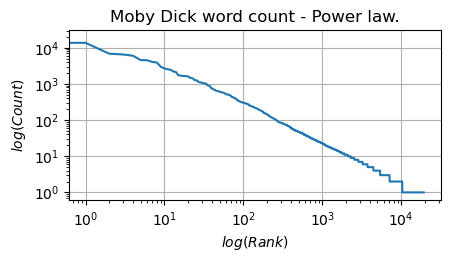

In [165]:
# Obtenemos todo el conteo
count = fdist.most_common()

# Obtenemos solo el conteo
count = np.array(count).T[1].T

# Pasamos a números
count = count.astype('float')
x = [i for i in range(len(count))]

plt.figure(figsize=(4.8, 2.25))
plt.yscale('log')
plt.xscale('log')
plt.plot(x, count)
plt.xlabel('$log(Rank)$')
plt.ylabel('$log(Count)$')
plt.title('Moby Dick word count - Power law.')

plt.grid()
plt.show()

## Distribuciones sobre contenido con filtro fino

- Como vimos en la sección anterior, los tokens más repetidos en un texto no son necesariamente las palabras que más información nos arrojan sobre el contenido del mismo. 
- Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideran signos de puntuación o caracteres especiales

In [104]:
# Una primera aproximación, es quedarnos con palabras grandes
long_words = [word for word in text1 if len(word)>5]

# Creamos el nuevo vocabulario
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[0:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Si hicieramos un análisis de tweets al rededor de una marca o persona, no nos interesan los conectores ni los signos, solo los adjetivos y verbos que se mencionana a la par (por eso esto podría ser útil). Ahora creamos ahora una nueva disribución con las palabras filtradas basados en los conteos ya pre-calculados de la función `FreqDist`, para esto: 

```python
fdist_filtrado = [('account', 2), ('additional': 32), ...]
```
Luego, podemos convertir el objeto creado a formato de `np.array` de Numpy para poder hacer un sort por palabras más frecuentes:
```python
fdist_filtrado = np.array(fdist_filtrado, *args)
```
Lo hacemos 👀:

In [112]:
# Filtramos 
palabras_interestantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]

# Creamos un dtype específicando que tenemos en nuestra lista
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interestantes = np.array(palabras_interestantes, dtype = dtypes)


palabras_interestantes[:15]

array([(b'anywhere', 14), (b'continued', 14), (b'deadly', 22),
       (b'rolling', 35), (b'received', 26), (b'narrow', 12),
       (b'island', 27), (b'breaking', 16), (b'passage', 32),
       (b'instantly', 17), (b'returned', 14), (b'precious', 18),
       (b'sailed', 38), (b'suspended', 27), (b'commotion', 11)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

In [129]:
palabras_interesantes = np.sort(palabras_interestantes, order = 'frequency', )
palabras_interesantes[:-10:-1]

array([(b'though', 335), (b'before', 293), (b'seemed', 283),
       (b'Queequeg', 252), (b'little', 247), (b'whales', 237),
       (b'through', 227), (b'Captain', 215), (b'himself', 203)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

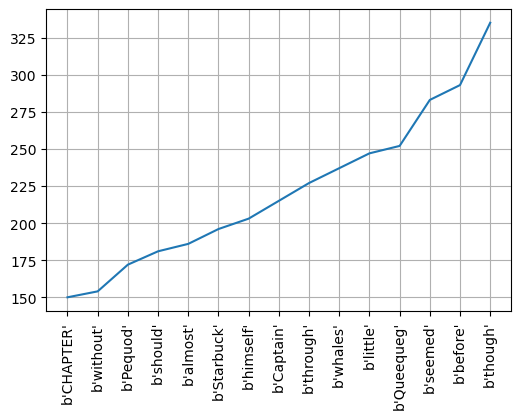

In [140]:
top_words = 15

words = palabras_interesantes[-top_words:]
y = [word[1] for word in words]
x = np.arange(len(y))
x_ticks = [word[0] for word in words]

#plt.figure(figsize=(10, 5))
plt.xticks(x, x_ticks, rotation = 'vertical')
plt.plot(x, y)
plt.grid()
plt.show()

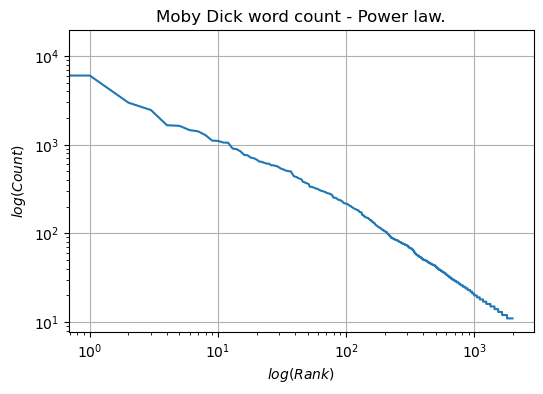

In [146]:
# Filtramos 
palabras_interestantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>2 and fdist[palabra]>10]

# Creamos un dtype específicando que tenemos en nuestra lista
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interestantes = np.array(palabras_interestantes, dtype = dtypes)

# Ordenamos
palabras_interesantes = np.sort(palabras_interestantes, order = 'frequency', )

# Creamos gráfica
words = palabras_interesantes[::-1]
y = [word[1] for word in words]
x = np.arange(len(y))

plt.yscale('log')
plt.xscale('log')
plt.plot(x, y)
plt.xlabel('$log(Rank)$')
plt.ylabel('$log(Count)$')
plt.title('Moby Dick word count - Power law.')

plt.grid()
plt.show()

Podemos consultar todas las stopwords (palabras no interesantes) con NLTK:

In [157]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '